## Linear Regression

Linear regression is one of the simplest and most straightforward approaches for supervised learning. For any supervised learning task, the first step is to come up with a model to predict the response $Y$ on the basis of one or more predictor variables $X$:

$$\hat{Y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$

$\beta_i$'s are the parameters and $\hat{Y}$ is the predicted response from our model. To complete our model, we only need to figure out the values for $\beta_i$.

We have the training set $(X_i, Y_i)$, and a reasonable approach is to find a set of $\beta$'s so that $\hat{Y}$ is as close to $Y$ as possible, for the given set of points. A typical function to determine the closeness between the response and predicted response is the least-squares cost function.

$$J(\beta) = \sum_{i=1}^n(\hat{y}_i - y_i)^2$$

where $n$ is the number of observations. The goal now is to find a set of $\beta$'s that minimizes $J(\beta)$. One way to solve this is by running an optimization algorithm that starts with an initial guess for $\beta$'s and iteratively changes $\beta$ to minimize $J(\beta)$. One such algorithm is the Gradient Descent algorithm. 

#### Gradient Descent
Gradient descent is based on the fact that a function $f(x)$ decreases fastest from any point $a$ if you go in the direction of the negative gradient at that point. The gradient is given by evaluating the partial derivative of the cost function. For a single update:

$$\beta_i^{new} = \beta_i - \gamma \frac{\partial}{\partial \beta_i}J(\beta)$$

Here, $\gamma$ is the learning rate - determines how quickly (or how much) $\beta$ is updated. For the least squares expression, the gradient is given by:

$$\frac{\partial}{\partial \beta_i}J(\beta) = \frac{1}{2} (\hat{y} - y)x_i$$

$x_i$ is introduced because $\hat{y}$ is a function of $x$.

In [1]:
def cost_fn(X, y, beta):
    return ((X.dot(beta) - y) ** 2).sum() / 2 / len(y)

def gradient_descent(X, y, beta, gamma, iters):
    cost_hist = numpy.zeros(iters)
    for i in range(iters):
        hypothesis = X.dot(beta)
        loss = hypothesis - y
        gradient = X.T.dot(loss) / len(y)
        new_beta = beta - gamma*gradient
        beta = new_beta
        cost_hist[i] = cost_fn(X, y, beta)
    return beta, cost_hist

The functions defined above vary slightly from the cost function defined earlier. There is an additional $\frac{1}{2n}$, and a corresponding change in the expression for the gradient. This is just for convenience, and to have a measure of average error per data point rather than the total error.

Also of note is that there are no loops in the algorithm. This method looks at all the training points at each step, and is called __batch gradient descent__. The variables are all matrices, and we could operate on them directly. We could also proceed iteratively, looking at each point or a subset of points at every step. In that case the algorithm is called __stochastic gradient descent__.

Let's look at an example.

In [2]:
import pandas
import numpy
import patsy
import matplotlib.pyplot as plt
%matplotlib inline

          X        Y
2    8.5186  13.6620
30   5.2524  -1.2200
43   5.7737   2.4406
68   5.4994   1.0173
21  20.2700  21.7670


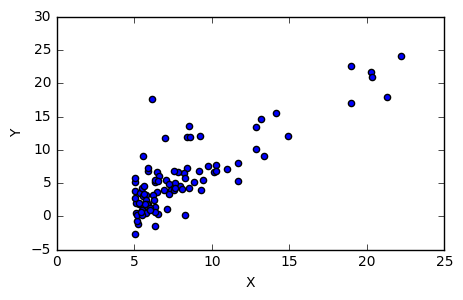

In [3]:
data = pandas.read_csv('ex1_simple.txt', names=['X', 'Y'])
print(data.sample(5))

fig, ax = plt.subplots(figsize=(5, 3))
ax.scatter(data['X'], data['Y'])
ax.set_xlabel('X')
ax.set_ylabel('Y')

The batch gradient descent requires the inputs to be fed as matrices. We would also need to add an extra column of $1$s to the X matrix to account for $x_0$ which is not explicitly present in the expressions written earlier. Let's run our algorithm with an initial estimate of $0$ for our parameters.

In [4]:
dmat = patsy.dmatrices('Y ~ X', data)
X = numpy.array(dmat[1])
y = numpy.array(dmat[0])

iters = 2000
gamma = 0.01
beta_init = numpy.array([[0], [0]])
betas, cost_history = gradient_descent(X, y, beta_init, gamma, iters)
print(betas)

[[-3.78806857]
 [ 1.18221277]]


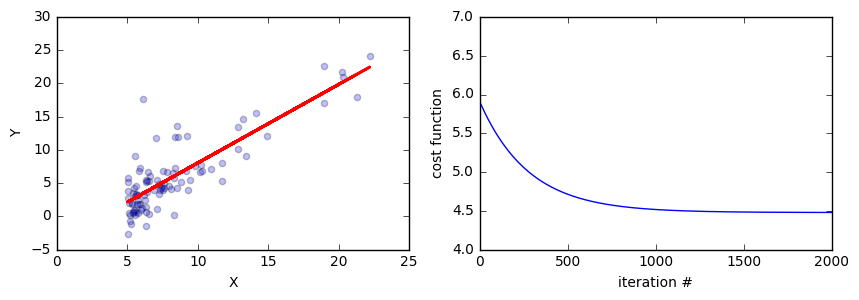

In [5]:
y_preds = X.dot(betas)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(data['X'], data['Y'], alpha=0.25)
axes[0].plot(data['X'], y_preds, color='red', linewidth=2)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

axes[1].plot(range(len(cost_history)), cost_history)
axes[1].set_xlabel('iteration #')
axes[1].set_ylabel('cost function')

#### Least-squares solution
Another way to determine the parameters is by explicitly minimizing the cost function by setting the derivative to $0$ (closed-form solution). $J(\beta)$ can be expressed in terms of matrix variables:

$$J(\beta) = \frac{1}{2}(X\beta - y)^T(X\beta - y)$$

After some basic analysis, one can find that the gradient of $J(\beta)$ is given by:

$$\nabla_\beta J = X^TX\beta - X^Ty$$

Setting it to $0$ yields,

$$\beta = (X^TX)^{-1}X^Ty$$

We can now directly use this to determine our parameters (as long as the data can fit in the memory to enable vectorized operations).

In [6]:
def OLS(X, Y):
    return numpy.linalg.inv(numpy.dot(X.T, X)) @ X.T @ Y

In [7]:
data = pandas.read_csv('ex2.csv')
print(data.sample(5))

     Unnamed: 0     TV  Radio  Newspaper  Sales
8             9    8.6    2.1        1.0    4.8
118         119  125.7   36.9       79.2   15.9
5             6    8.7   48.9       75.0    7.2
45           46  175.1   22.5       31.5   14.9
188         189  286.0   13.9        3.7   15.9


In [8]:
dmat = patsy.dmatrices('Sales ~ TV + Radio + Newspaper', data)
X = numpy.array(dmat[1])
y = numpy.array(dmat[0])

betas = OLS(X, y)
print(betas)

[[  2.93888937e+00]
 [  4.57646455e-02]
 [  1.88530017e-01]
 [ -1.03749304e-03]]


In [9]:
y_pred = X.dot(betas)